# CHAPTER 2. 지도 학습
지도학습: 샘플데이터가 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.

-> 훈련 세트로 부터 머신러닝 모델을 만든다.

목표: 이전에 본적없는 새로운 데이터에 대해 정확한 출력을 예측

단점: 지도 학습은 훈련 데이터를 만드는데 사람의 노력이 필요

장점: 자동화 하면 힘들고 어려운 작업의 속도를 높일 수 있다

## 2.1 분류와 희귀

# 분류 
분류는 미리 정의된 가능성 있는 클래스 레이블(Class label)중 하나를 예측하는 것 ( 예: 1장의 붓꽃 어플리케이션)

분류는 딱 두개의 클래스로 분류하는 이진 분류(binary classificatoin)와 셋 이상의 클래스로 분류하는 다중 분류(Multiclassclassification)으로 나뉨

이진분류: '예/아니오'로 나뉠 수 있는것이라고 생각하면 됨 (예시- 스팸메일 인가요? : 예/아니오)

다중분류: 여러 클래스 중 하나로 분류 (예: 붓꽃 어플리케이션, 웹사이트 글로부터 어느 언어의 웹사이트인지 예측) 

-> 연속적이지 않음 -> 사이트 분류할때 한 언어가 아니면 다른언어임, 영어랑 프랑스어 사이에 다른 언어는 없음

## 회귀

연속적인 숫자( 프로그래밍 용어로 부동소수점수, 수학 용어로 실수)를 예측

예시로 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 -> 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될수 있다.

출력값에 연속성이 있음 -> 연소득 예측에서 40,000,000원 또는 40,000,001원을 벌 수 있음. -> 다르지만 큰 차이 없다.

## 2.2 일반화, 과대적합, 과소적합

일반화 (generalization)

과대적합 (overfiting)

과소적합 (underfiting)

모델을 복잡하게 할 수록 훈련데이터에 대해서 더 정확히 예측

하지만 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해짐 -> 새로운 데이터에 일반화 잘 못함

## 2.3 지도 학습 알고리즘

다양한거 알아보고 장단점도 알아보자

In [1]:
from IPython.display import display
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.3.1 예제에 사용할 데이터셋

### 분류(인위적)
어떤 데이터셋은 작고 인위적이고 알고리즘의 특징을 부각하기 위해 만든것
실제  샘플로 만든 데이터도 있다.

데이터 셋을 만듬 -> forge 데이터셋은 인위적으로 만든 이진 분류 세트.

In [2]:
X,y = mglearn.datasets.make_forge()

산점도를 그리자

X.shape:(26, 2)


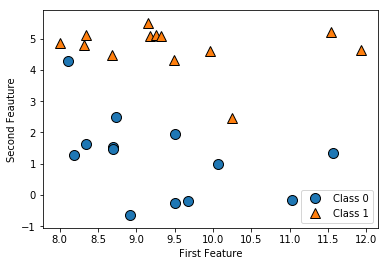

In [9]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feauture")
print("X.shape:{}".format(X.shape))

데이터포인트 26개, 특성 2개

### 회귀(인위적)
인위적으로 만든 wave데이터셋 사용

wave 데이터세트 : 입력 특성 하나와 모델링할 타깃 변수( 또는 응답) 을 가짐

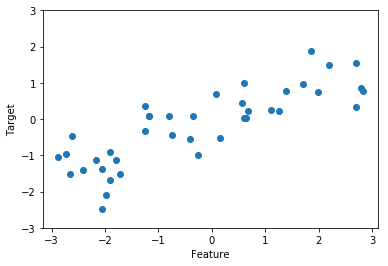

In [10]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

저차원을 예시로 들자 (저차원 데이터셋에서 얻은 직관이 고차원 데이터셋에서 그대로 유지 되지 않을 수 있음)

scikit-learn에 들어있는 실제 데이터셋 두개도 사용해보자
### 실제 분류 데이터 : 위스콘신 유방암 데이터
유방암 종양의 임상 데이터를 기록 -> 각 종양은 양성(암X)과 악성(암) 종양으로 레이블 됨-> 조직데이터로 양성인지 악성인지 예측가능

scikit-learn에 있는 load_breast_cancer 함수로 불러옴

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


scikit-learn에 포함된 데이터셋은 실제 데이터와 데이터 셋 관련 정보를 담고 있는 Bunch 객체에 저장

-> Bunch 객체는 파이선 딕셔너리와 비슷하지만 점 표기법 사용가능 -> bunch['key]대신 bunch.key 사용 가능


In [13]:
print("유방함 데이터의 형태:{}".format(cancer.data.shape))

유방함 데이터의 형태:(569, 30)


이 데이터셋은 569개의 데이터 포인트, 특성 30개 -> 악성과 양성은 각각 몇개일까?

In [14]:
print("클래스 별 샘플 개수 :\n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플 개수 :
{'malignant': 212, 'benign': 357}


양성(benign): 357개, 음성(malignant):212개

feature_names 속성을 확인하면 각 특성의 의미를 알 수 있음

In [15]:
print("특성의 이름:\n{}".format(cancer.feature_names))

특성의 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


데이터에 관한 더 자세한 정보는 cancer.DESCR에서 확인할 수 있음

### 회귀 분석용 실제 데이터 : 보스턴 주택가격

범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용 -> 1970년대 보스턴 주변 주택 평균 가격 예측

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 형태:{}".format(boston.data.shape))

데이터 형태:(506, 13)


506개의 데이터포인트와 특성 13개

boston 객체의 DESCR 속성에서 더 자세한 정보 확인 할 수 있음

13개의 입력 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장 -> 특성의 곱도 특성으로 생각함 -> 특성공학(4장에서 나올것)

유도된 데이터셋은 아래 코드로 불러옴

In [20]:
X,y =mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


13개의 원래 특성에 13개씩에서 2개씩 (중복포함) 짝지은 91개 특성 더해 총 104개 됨

## 2.3.2 k-최근법 이웃
k-NN ( k-Nearest Neigbors ) 알고리즘은 가장 간단한 머신러닝 알고리즘 -> 훈련 데이터셋을 그냥 저장하는 것이 모델 만드는게 전부

새로운 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트(최근접 이웃)을 찾음

### k-최근접 이웃 분류
가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측 -> 이 훈련 데이터 포인트의 출력이 예측됨

forge데이터셋을 분류해보자

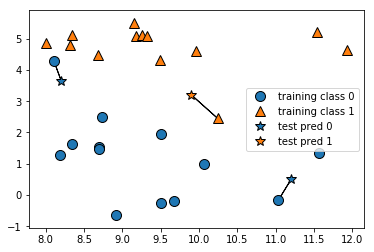

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

데이터 포인트 3개 추가( 별모양 ) -> 가장 가까운 포인트 데이터 연결 -> 1-최근접 이웃 알고리즘의 예측은 가장 가까운 데이터 포인트의 레이블

1개가 아니라 k개 선택 가능 (그래서 k-최근접 이웃 알고리즘이라 부름) -> 둘 이상의 이웃을 선택할때는 레이블을 정하기 위해 투표함 -

-> 데이터 포인트에 클래스1이 몇개 클래스0이 몇개인지 셈 -> 이웃이 더 많은 클래스를 레이블로 지정

k=3

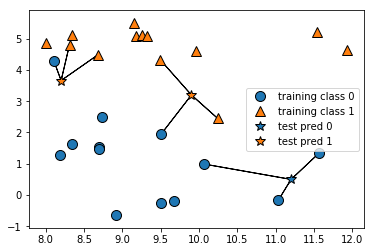

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

클래스가 다수 일때도 적용 가능 -> 클래스가 여러개이면 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용

scikit-learn을 사용해서 k-최근법 이웃 알고리즘 적용하자 -> train세트와 test세트로 나눔

In [26]:
from sklearn.model_selection import train_test_split
X, y=mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

임포트 -> 이웃 수를 3으로 지정

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

train세트 학습 -> KNeighborsClassifier에서는 저장

In [27]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

테스트 데이터에 대해 predict 메서드 호출하여 예측 -> 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산

In [29]:
print("테스트 세트 예측:{}".format(clf.predict(X_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]


얼마나 정확할까(일반화 되었을까)? -> score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

In [30]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86
